In [7]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from heapq import nsmallest

In [77]:
lista1 = [1, 2, 3, 4, 5]
lista2 = lista1

In [78]:
lista1[3] = 10

In [115]:
tal = 3.1415

In [127]:
#print(f'Talet avrundat blev : {tal:10.2f}')
print(f'Talet avrundat blev : {tal:<10.2f}')
print(f'Talet avrundat blev : {tal:.2f}')
print(f'Talet avrundat blev : {tal:.3}')

Talet avrundat blev : 3.14      
Talet avrundat blev : 3.14
Talet avrundat blev : 3.14


## This code is splitted into multiple steps

1. We explain the how we choose the stocks that we wanted to include in our portfolio.
2. We get data from yahoo finance, process it and present it
3. Preparing the data for LSTM

In [71]:
x = random.randint(1,
                   10) * random.randint(10, 20)

In [72]:
x

30

In [28]:
x = random.randint(1, %
                  10) * random.randint(10, 20)


SyntaxError: invalid syntax (<ipython-input-28-8dcf7b1e4d09>, line 1)

In [46]:
x = random.randint(1, 10) * random.randint(10, 20)

In [47]:
x

85

In [23]:
import random

In [19]:
type(True) 

bool

## 1.

In [26]:
# Reading in a list of stocks from the NASDAQ largecap exchange. These are then filtered for time on the stoch exchange. 
stocks_raw = pd.read_csv('/mnt/c/Users/Anton/Dropbox/PythonProjects/Python Projects/Python in Financial Engineering/Project Work/largecap.csv', sep=';', encoding='latin-1', parse_dates = True, infer_datetime_format = True, index_col = 'listingdate')
stocks_filtered = stocks_raw[stocks_raw.index <= '2000-01-01'].copy()
stocks_filtered

,company,volume100d,sector,industry
listingdate,,,,
1999-06-22,ABB,"1411425,625",Industrials,Industrial Machinery
1994-11-08,Assa Abloy,"2023678,875",Industrials,Construction Supplies
1999-04-06,AstraZeneca,"501995,8438",Health Care,Pharmaceuticals
1973-01-01,Atlas Copco A,"1111550,5",Industrials,Industrial Machinery
1994-07-14,Atrium Ljungberg,"179766,4063",Financials,Real Estate
...,...,...,...,...
1989-07-03,SSAB B,"3446860,5",Materials,Mining - Steel & Aluminum
1997-01-02,Stora Enso A,"13966,51953",Materials,Forest & Wood Products
1998-08-24,Sweco A,"2118,939941",Industrials,Business Consultants


In [27]:
# Filtering for stocks that have a volume that is higher than the mean. This is to only get those stocks that are liquid
stocks_filtered['volume100d'] = stocks_filtered['volume100d'].str.replace(',', '.').astype(float)
stocks_filtered = stocks_filtered[stocks_filtered['volume100d'] >= stocks_filtered['volume100d'].mean()]
stocks_filtered

,company,volume100d,sector,industry
listingdate,,,,
1999-06-22,ABB,1411425.625,Industrials,Industrial Machinery
1994-11-08,Assa Abloy,2023678.875,Industrials,Construction Supplies
1973-01-01,Atlas Copco A,1111550.500,Industrials,Industrial Machinery
1985-01-01,Electrolux B,1247480.375,Consumer Durables,Consumer Electronics
1994-03-01,Elekta,1535047.875,Health Care,Medical Equipment
1976-01-01,Ericsson B,7240196.500,Technology,Communications
1995-06-08,Getinge,1074312.375,Health Care,Medical Supplies
1974-06-17,Hennes & Mauritz,4813372.000,Consumer Durables,Clothing & Footwear
1997-12-15,Nordea Bank,7857396.500,Financials,Banks


In [18]:
# Looking how many unique sectors there are. 

print(len(stocks_raw['sector'].unique()))
print(len(stocks_filtered['sector'].unique()))
len(stocks_filtered['sector'].unique()) / len(stocks_raw['sector'].unique())

9
7


0.7777777777777778

In [22]:
# Dropping the duplicates within industry and sector.

stocks_filtered_industry = stocks_filtered.drop_duplicates('industry')
stocks_filtered_sector = stocks_filtered.drop_duplicates('sector')
print(len(stocks_filtered_industry))
print(len(stocks_filtered_sector))

14
7


In [23]:
# Printing the results after removing duplicates. 

print(stocks_filtered_industry)
print(stocks_filtered_sector)

                      company   volume100d             sector  \
listingdate                                                     
1999-06-22                ABB  1411425.625        Industrials   
1994-11-08         Assa Abloy  2023678.875        Industrials   
1985-01-01       Electrolux B  1247480.375  Consumer Durables   
1994-03-01             Elekta  1535047.875        Health Care   
1976-01-01         Ericsson B  7240196.500         Technology   
1995-06-08            Getinge  1074312.375        Health Care   
1974-06-17   Hennes & Mauritz  4813372.000  Consumer Durables   
1997-12-15        Nordea Bank  7857396.500         Financials   
1987-01-01              SCA B  1765903.125          Materials   
1991-07-09          Securitas  1292955.250        Industrials   
1965-01-01            Skanska  1079145.125        Industrials   
1982-01-01              SKF B  1549650.250        Industrials   
1989-07-03             SSAB A  4616178.500          Materials   
1996-05-14            Tel

In [5]:
# Picking the stocks from the unique industry list as it gives a nice diversification.
tickers = ['ABB.ST', 'ASSA-B.ST', 'ELUX-B.ST', 'EKTA-B.ST', 'ERIC-B.ST', 'GETI-B.ST', 'HM-B.ST', 'NDA-SE.ST', 'SCA-B.ST', 'SECU-B.ST', 'SKA-B.ST', 'SKF-B.ST', 'SSAB-B.ST', 'TEL2-B.ST']

In [45]:
df = pdr.get_data_yahoo(tickers, start = '2000-01-01', end = '2020-12-10')['Close']
df = df.dropna()
df.head()

Symbols,ABB.ST,ASSA-B.ST,ELUX-B.ST,EKTA-B.ST,ERIC-B.ST,GETI-B.ST,HM-B.ST,NDA-SE.ST,SCA-B.ST,SECU-B.ST,SKA-B.ST,SKF-B.ST,SSAB-B.ST,TEL2-B.ST
Date,,,,,,,,,,,,,,
2012-06-18,112.599998,62.400002,127.900002,81.449997,63.299999,143.835999,226.399994,56.250000,21.233601,53.599998,99.699997,132.199997,34.571098,101.084000
2012-06-19,114.900002,62.866699,129.800003,81.050003,64.500000,143.673996,230.399994,57.799999,21.233601,54.049999,100.500000,134.500000,35.603901,102.625999
2012-06-20,115.099998,63.466702,136.300003,81.599998,64.800003,142.298004,241.500000,58.150002,21.233601,54.349998,101.900002,137.300003,36.622002,102.722000
2012-06-21,114.800003,63.366699,137.199997,81.849998,63.599998,141.246002,246.199997,57.650002,21.090900,53.849998,101.400002,135.100006,37.098000,99.734802
2012-06-25,109.900002,62.400002,133.000000,79.500000,62.000000,140.113007,242.300003,56.400002,20.601299,52.450001,98.900002,129.500000,34.651699,99.445702


In [62]:
# We compute the log-return correlation matrix. 

logReturn = np.log(df/df.shift(1))
corr_matrix = logReturn.corr()
corr_matrix_box_mean = corr_matrix.mean()
print(corr_matrix)

Symbols      ABB.ST  ASSA-B.ST  ELUX-B.ST  EKTA-B.ST  ERIC-B.ST  GETI-B.ST  \
Symbols                                                                      
ABB.ST     1.000000   0.551133   0.450056   0.309828   0.408138   0.278441   
ASSA-B.ST  0.551133   1.000000   0.412301   0.291934   0.365384   0.330482   
ELUX-B.ST  0.450056   0.412301   1.000000   0.230915   0.287909   0.251236   
EKTA-B.ST  0.309828   0.291934   0.230915   1.000000   0.215705   0.266704   
ERIC-B.ST  0.408138   0.365384   0.287909   0.215705   1.000000   0.250783   
GETI-B.ST  0.278441   0.330482   0.251236   0.266704   0.250783   1.000000   
HM-B.ST    0.395156   0.406861   0.361358   0.242273   0.270380   0.154107   
NDA-SE.ST  0.536900   0.473044   0.415614   0.242199   0.367478   0.229671   
SCA-B.ST   0.466167   0.444881   0.380658   0.296256   0.363928   0.288879   
SECU-B.ST  0.501598   0.538117   0.391645   0.280789   0.345475   0.254558   
SKA-B.ST   0.557000   0.538289   0.413516   0.285710   0.353931 

In [50]:
# We look at the mean correlation between the assets
print(corr_matrix_box_mean)

Symbols
ABB.ST       0.493046
ASSA-B.ST    0.473290
ELUX-B.ST    0.404159
EKTA-B.ST    0.312036
ERIC-B.ST    0.371103
GETI-B.ST    0.301572
HM-B.ST      0.391578
NDA-SE.ST    0.454022
SCA-B.ST     0.423918
SECU-B.ST    0.452143
SKA-B.ST     0.477824
SKF-B.ST     0.474533
SSAB-B.ST    0.410372
TEL2-B.ST    0.344129
dtype: float64


In [51]:
# We look at the assets which had the smallest mean correlation between eachother.

print(nsmallest(6, corr_matrix_box_mean))
print('[SKA-B.ST,            EKTA-B.ST,           GETI-B.ST,           ERIC-B.ST,         TEL2-B.ST,         HM-B.st            ]')

[0.3015719006389189, 0.31203558161164124, 0.344129426140454, 0.3711031739792328, 0.3915780588071901, 0.404158515591401]
[SKA-B.ST,            EKTA-B.ST,           GETI-B.ST,           ERIC-B.ST,         TELE2-B.ST,         HM-B.st            ]


## 2. 

In [261]:
tickers = ['SKA-B.ST', 'EKTA-B.ST', 'GETI-B.ST', 'ERIC-B.ST', 'TEL2-B.ST', 'HM-B.ST']
#stock_data = ext_datareader(tickers, start='2014-10-01', end='2020-10-01')

In [474]:
stock_data.head()

Asset,SKA,EKTA,GETI,ERIC,TEL2,HM
2014-10-01,145.800003,70.550003,146.425995,90.400002,83.064201,294.500000
2014-10-02,144.600006,71.250000,145.455002,89.250000,81.811501,288.399994
2014-10-03,147.699997,71.050003,147.559998,90.599998,82.486000,291.000000
2014-10-06,146.600006,71.000000,148.044998,89.500000,83.256897,290.500000
2014-10-07,144.800003,70.500000,147.317001,86.849998,82.486000,286.200012


In [79]:
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from numpy import array

In [303]:
""" We create a class because we need the stock-data from every asset within our portfolio. 
By storing the dowloaded data within the object, we only need to specify our portfolio once,
then we can train a model on every individual asset.
"""


class Portfolio(object):
    def __init__(self, tickers, start, end):
        self.tickers = tickers
        self.start = start
        self.end = end
        self._data = self.ext_datareader() # Runs the ext_datareader when we initialize the data_reader
        
        
    def ext_datareader(self):
        """Converts pandas-datareader yahoo data to a cleaner format.
        Parameters
        ----------
        raw_data : pd.DataFrame
            Rows represents different timestamps stored in index. Note that there can be gaps. Columns are pd.MultiIndex
            with the zero level being assets and the first level indicator.
        Returns
        -------
        df : pd.DataFrame
            A cleaned pd.DataFrame.

        """
        df = pdr.get_data_yahoo(self.tickers, self.start, self.end)
        df = df.drop(['High', 'Low', 'Open', 'Volume'], axis=1, level=0) # drops the columns we don't need
        df.index.name = None # removes the date index
        df = df.swaplevel(0, 1, axis=1) # swaps the multiindex
        df.columns.rename(names = ['Asset', 'Channel'], inplace = True)

        #_list = df.columns.levels[0].tolist()
        #new_list = [_list[i][:-5] for i in range(len(_list))]
        #df.columns.set_levels(new_list , level=0, inplace=True)
        df.replace(0, np.nan, inplace=True)
        #df = df.droplevel(level=1, axis=1)
        df.to_csv('/mnt/c/Users/Anton/Documents/Models/portfolio.csv')
        print('Tickers read...')
        print(f'You have {df.columns.levels[0].tolist()} in your portfolio')
        return df.interpolate().dropna()
    
    def TrainModel(self, stock, split_ratio = 0.8, batch_size = 5, look_back = 40, epochs = 50, save_graph=True):
        """ Univariate model """
        
        # Load the data from the pd.DataFrame
        data = self._data[stock].filter(['Adj Close'])
        dataset = data.values
        training_data_len = math.ceil(len(dataset) * split_ratio)
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(dataset)
        X, y = self.processData(scaled_data, look_back)
        
        # Divide the data into training and testing data. Default split ratio is 0.8
        X_train, X_test = X[:int(X.shape[0] * split_ratio)], X[int(X.shape[0] * split_ratio):]
        y_train, y_test = y[:int(y.shape[0] * split_ratio)], y[int(y.shape[0] * split_ratio):]
        pd.DataFrame(X_train).to_csv(f'/mnt/c/Users/Anton/Documents/Models/Train Data/{stock}-X_train.csv', index=False)
        pd.DataFrame(X_test).to_csv(f'/mnt/c/Users/Anton/Documents/Models/Test Data/{stock}-X_test.csv', index=False)
        pd.DataFrame(y_train).to_csv(f'/mnt/c/Users/Anton/Documents/Models/Train Data/{stock}-y_train.csv', index=False)
        pd.DataFrame(y_test).to_csv(f'/mnt/c/Users/Anton/Documents/Models/Test Data/{stock}-y_test.csv', index=False)
        
        #Reshape data for (Sample,Timestep,Features) Has to be done because the models are very sensitive to input-shape
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] ,1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        
        # Create the model
        callback = EarlyStopping(monitor='loss', patience=3)
        model = self.model(look_back = look_back)
        history = model.fit(X_train, y_train, epochs=epochs, 
                            validation_data = (X_test,y_test), 
                            shuffle=True, batch_size = batch_size, callbacks = [callback])
        
        # ** Saving model-data **
        model.save(f'/mnt/c/Users/Anton/Documents/Models/{stock}')
        
        if save_graph == True:
            fig = plt.figure()
            plt.title(f'Loss of {stock}')
            plt.xlabel('Epochs', fontsize=14)
            plt.ylabel('Loss', fontsize=14)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.legend(['loss', 'val_loss'], loc='upper right')
            plt.savefig(f'/mnt/c/Users/Anton/Documents/Models/{stock}/{stock}-loss.png')
            plt.close(fig)
        return model, X_test, y_test, scaler
    
        #           ** Creating the LSTM network that is used for training. **
    
    def model(self, look_back):
        _model = Sequential()
        """ The models architecture is designed by reading previous studies and expriments.
        It has a two LSTM layers and two density layers. 
        
        LAYER 1 : LSTM: 52 neurons
        LAYER 2 : LSTM: 52 neurons
        LAYER 3 : DENSE : 25 neurons
        LAYER 4 ( OUTPUT ) : 1 neuron
        
        Optimizer for gradient decsent is adam.
        Loss is measured with Mean Squared Error.
        """
        _model.add(LSTM(52, return_sequences=True, input_shape=(look_back , 1))) # return_sequence has to be true when using multiple LSTM layers
        _model.add(LSTM(52, input_shape=(look_back , 1)))
        _model.add(Dense(25))
        _model.add(Dense(1))
        _model.compile(optimizer='adam', loss='mse')
        return _model

    def processData(self, data, look_back):
        X , Y = [] , []
        for i in range(len(data) - look_back - 1):
            X.append(data[i:(i + look_back),0])
            Y.append(data[(i + look_back),0])
        return array(X) , array(Y)
    
    @staticmethod
    def plotter(stock, model, x_test, y_test, scaler):
        Xt = model.predict(x_test)
        fig = plt.figure(figsize=(16,8))
        plt.title(f'LSTM model for {stock}')
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Adj Close Price SEK', fontsize=18)
        plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
        plt.plot(scaler.inverse_transform(Xt))
        plt.legend(['Val', 'Predictions'], loc='lower right')
        plt.savefig(f'/mnt/c/Users/Anton/Documents/Models/{stock}/{stock}-model_graph.png')
        plt.close(fig)
    
    @staticmethod
    def pred_act(x_test, scaler, y_test, model):
        act = []
        pred = []
        for i in range(294):
            #i=293
            Xt = model.predict(x_test[i].reshape(1,40,1))
            pred.append(scaler.inverse_transform(Xt))
            act.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))
        pred = np.array(pred).flatten()
        act = np.array(act).flatten()
        df_pred = pd.DataFrame(columns = tickers)
        df_act = pd.DataFrame(columns = tickers)
        df_pred[stock] = pred
        df_act[stock] = act
        df_pred.to_csv(f'/mnt/c/Users/Anton/Documents/Models/{stock}/{stock}-pred.csv', index=False)
        df_act.to_csv(f'/mnt/c/Users/Anton/Documents/Models/{stock}/{stock}-actual.csv', index=False)
        return act, pred

In [304]:
portfolio = Portfolio(tickers, start = '2013-10-01', end = '2020-10-01')

Tickers read...
You have ['SKA-B.ST', 'EKTA-B.ST', 'GETI-B.ST', 'ERIC-B.ST', 'TEL2-B.ST', 'HM-B.ST'] in your portfolio


In [305]:
for stock in tickers:
    model, x_test, y_test, scaler = portfolio.TrainModel(stock)
    portfolio.plotter(stock, model, x_test, y_test, scaler)
    act, prediction = portfolio.pred_act(x_test, scaler, y_test, model)
    rmse = np.sqrt(np.mean(((prediction - act)**2)))
    with open (f'/mnt/c/Users/Anton/Documents/Models/{stock}/{stock}-rmse.txt','w') as f:
               f.write(str(rmse)+'\n')

Epoch 1/50
275/275 [==============================] - 8s 27ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 2/50
275/275 [==============================] - 7s 24ms/step - loss: 9.3786e-04 - val_loss: 0.0039
Epoch 3/50
275/275 [==============================] - 7s 25ms/step - loss: 6.9316e-04 - val_loss: 0.0025
Epoch 4/50
275/275 [==============================] - 7s 25ms/step - loss: 6.2064e-04 - val_loss: 0.0016
Epoch 5/50
275/275 [==============================] - 7s 25ms/step - loss: 5.4043e-04 - val_loss: 0.0013
Epoch 6/50
275/275 [==============================] - 7s 24ms/step - loss: 4.7188e-04 - val_loss: 0.0012
Epoch 7/50
275/275 [==============================] - 7s 24ms/step - loss: 4.8699e-04 - val_loss: 0.0014
Epoch 8/50
275/275 [==============================] - 7s 25ms/step - loss: 3.7723e-04 - val_loss: 8.4694e-04
Epoch 9/50
275/275 [==============================] - 7s 25ms/step - loss: 3.6925e-04 - val_loss: 0.0012
Epoch 10/50
275/275 [==============================] - 

## 3.

In [354]:
def concat_df(type_ = ''):
    df = pd.DataFrame(columns = tickers)
    for stock in tickers:
        df[stock] = pd.read_csv(f'/mnt/c/Users/Anton/Documents/Models/{stock}/{stock}-{type_}.csv')[stock]
    return df

In [379]:
actual = concat_df(type_ = 'actual')

In [381]:
predicted = concat_df(type_='pred')

In [575]:
def calc_return():
    returns = [] 
    
    for stock in tickers:
        returns.append((predicted[stock].iloc[-1] - actual[stock].iloc[-2]) / actual[stock].iloc[-2]) 
        
    df = pd.DataFrame([returns], columns = tickers)
    return df.T

In [576]:
mean = calc_return()

In [577]:
mean

,0
SKA-B.ST,0.003109
EKTA-B.ST,0.016434
GETI-B.ST,-0.005667
ERIC-B.ST,-0.000773
TEL2-B.ST,0.017092
HM-B.ST,0.006105


In [ ]:
def calc_cov(X1, X2):
    for t in range(len(y_test)):
        (actual.pct_change() - A) * (acti)

In [472]:
cov_matrix = actual.pct_change().cov()

TypeError: cov() got an unexpected keyword argument 'bias'

In [553]:
A = actual['SKA-B.ST'].pct_change().dropna() - mean['SKA-B.ST'].values
B = actual['EKTA-B.ST'].pct_change().dropna() - mean['EKTA-B.ST'].values
C = actual['GETI-B.ST'].pct_change().dropna() - mean['GETI-B.ST'].values
D = actual['ERIC-B.ST'].pct_change().dropna() - mean['ERIC-B.ST'].values
E = actual['TEL2-B.ST'].pct_change().dropna() - mean['TEL2-B.ST'].values
F = actual['HM-B.ST'].pct_change().dropna() - mean['HM-B.ST'].values

In [554]:
A

1     -0.003726
2     -0.008356
3     -0.011796
4      0.004716
5     -0.005283
         ...   
289   -0.012003
290   -0.015929
291    0.000527
292    0.000514
293   -0.000530
Name: SKA-B.ST, Length: 293, dtype: float64

In [739]:
data = np.array([A, B, C, D, E, F])


daily_cov = np.cov(data, bias = False)

In [627]:
pd.DataFrame(cov_matrix2)

,0,1,2,3,4,5
0,0.000449,0.000247,0.000096,0.000220,0.000156,0.000354
1,0.000247,0.000876,0.000184,0.000215,0.000113,0.000348
2,0.000096,0.000184,0.000625,0.000198,0.000143,0.000025
3,0.000220,0.000215,0.000198,0.000589,0.000184,0.000251
4,0.000156,0.000113,0.000143,0.000184,0.000317,0.000164
5,0.000354,0.000348,0.000025,0.000251,0.000164,0.000821


In [544]:
pd.DataFrame(cov_matrix2)

,0,1,2,3,4,5
0,0.000449,0.000247,0.000096,0.000220,0.000156,0.000354
1,0.000247,0.000876,0.000184,0.000215,0.000113,0.000348
2,0.000096,0.000184,0.000625,0.000198,0.000143,0.000025
3,0.000220,0.000215,0.000198,0.000589,0.000184,0.000251
4,0.000156,0.000113,0.000143,0.000184,0.000317,0.000164
5,0.000354,0.000348,0.000025,0.000251,0.000164,0.000821


In [740]:
cov_matrix2 = daily_cov * 252

In [741]:
def portfolio_stats(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        volatility of portfolio return
    pret / pvol : float
        Sharpe ratio, assuming risk free-rate rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(mean.values * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix2, weights)))
    return np.array([pret, pvol, pret / pvol])

In [742]:
mean.values

array([[ 0.00310889],
       [ 0.0164336 ],
       [-0.00566688],
       [-0.00077286],
       [ 0.01709163],
       [ 0.0061053 ]])

In [743]:
def min_func_sharpe(weights):
    return -portfolio_stats(weights)[2]

In [744]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) # a tuple of dict

In [745]:
# tuple comprehension, must use tuple(       )
bnds = tuple((0, 1) for x in range(len(tickers)))
#bnds = ((0, 1) for x in range(noa))  # does not give you directly tuples, but a generator
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [746]:
initialGuess= np.ones(len(tickers))*(1./len(tickers))
initialGuess

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [747]:
import scipy.optimize as sco
# maximize Sharpe Ratio
opts = sco.minimize(min_func_sharpe, initialGuess, method='SLSQP',
                       bounds=bnds, constraints=cons)
opts

     fun: -38.56620562011751
     jac: array([-6.47544861e-04,  5.24520874e-05,  7.79151917e-04,  2.84671783e-04,
       -6.38961792e-05, -8.48770142e-05])
 message: 'Optimization terminated successfully'
    nfev: 78
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.20291714, 0.07098703, 0.18398293, 0.05948996, 0.44014741,
       0.04247554])

In [748]:
print('Weights for portfolio with highest Sharpe Ratio', opts['x'].round(3)) 

Weights for portfolio with highest Sharpe Ratio [0.203 0.071 0.184 0.059 0.44  0.042]


In [749]:
print('The return, volatility and Sharpe-Ratio are:', portfolio_stats(optv['x']).round(3))

The return, volatility and Sharpe-Ratio are: [ 9.148  0.258 35.52 ]


In [750]:
# objective function if you want to minimize variance
def min_func_variance(weights):
    return portfolio_stats(weights)[1] ** 2

In [751]:
optv = sco.minimize(min_func_variance, initialGuess, method='SLSQP',
                       bounds=bnds, constraints=cons)
optv

     fun: 0.05625975015437115
     jac: array([0.11276854, 0.11285028, 0.1128135 , 0.1122539 , 0.11230523,
       0.11206436])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.20484596, 0.07129874, 0.1846186 , 0.05932718, 0.43940442,
       0.0405051 ])

In [752]:
print('Weights for portfolio with minimum  variance',optv['x'].round(3))

Weights for portfolio with minimum  variance [0.205 0.071 0.185 0.059 0.439 0.041]


In [753]:
# portfolio volatility /standard deviation
def min_func_port(weights):
    return portfolio_stats(weights)[1]

In [754]:
trets = np.linspace(0.001, 0.05, 100)  
tvols = []
for tret in trets:
    #print('target return is', tret)
    cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, initialGuess, method='SLSQP',
                       bounds=bnds, constraints=cons)
    #print('The minimum vol is', res['fun'])
    tvols.append(res['fun']) #the value of the objective, i.e. standard deviation of portfolio returns
tvols = np.array(tvols)

In [755]:
# prepare lists for portfolio returns and volatilities
prets = []
pvols = []
pSharpe =[]

# randomly generate 2500 portfolios
for p in range (2500):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
        
    # portfolio return
    ret = np.sum(mean.values * weights) * 252
    #portfolio volatility
    vol = np.sqrt(np.dot(weights, 
                        np.dot(cov_matrix2 * 252, weights.T)))
       
    prets.append(ret)       
    pvols.append(vol)
    #portfolio Sharpe ratio
    sharpe = ret/vol
    pSharpe.append(sharpe)

In [726]:
mean * 252

,0
SKA-B.ST,0.783439
EKTA-B.ST,4.141267
GETI-B.ST,-1.428054
ERIC-B.ST,-0.194761
TEL2-B.ST,4.307090
HM-B.ST,1.538537


Text(0.5, 1.0, 'Minimum risk portfolios for given return level (crosses)')

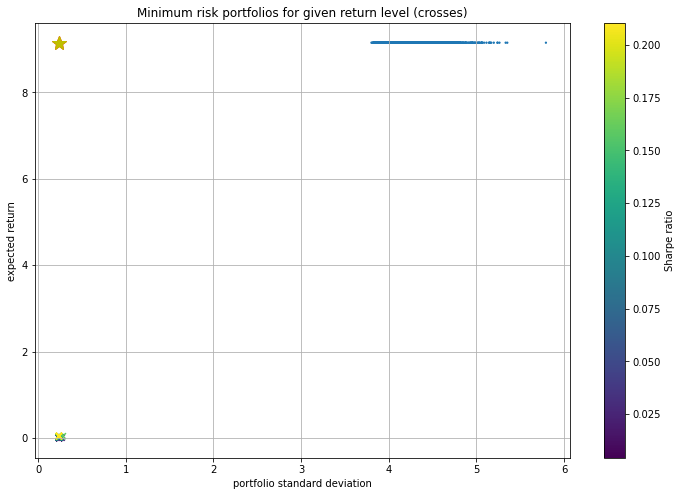

In [759]:
plt.figure(figsize=(12, 8))
plt.scatter(pvols, prets,
            pSharpe, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets, c = trets/tvols, marker='x')
#             # efficient frontier
plt.plot(portfolio_stats(opts['x'])[1], portfolio_stats(opts['x'])[0],'r*', markersize=15.0)
           # portfolio with highest Sharpe ratio
plt.plot(portfolio_stats(optv['x'])[1], portfolio_stats(optv['x'])[0],
         'y*', markersize=15.0)
#             # minimum variance portfolio
plt.grid(True)
plt.xlabel('portfolio standard deviation')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.title('Minimum risk portfolios for given return level (crosses)')